/data/out/cst/fwdrange/report.tsv
/data/out/cst/revrange/report.tsv
/data/out/cst/multireadrandom/report.tsv
/data/out/cst/readrandom/report.tsv
/data/out/cst/readwhilewriting/report.tsv
/data/out/cst/overwrite/report.tsv
/data/out/cst/fwdrangewhilewriting/report.tsv
/data/out/cst/revrangewhilewriting/report.tsv
/data/out/cst/bulkload/report.tsv
/data/out/ori/fwdrange/report.tsv
/data/out/ori/revrange/report.tsv
/data/out/ori/multireadrandom/report.tsv
/data/out/ori/readrandom/report.tsv
/data/out/ori/readwhilewriting/report.tsv
/data/out/ori/overwrite/report.tsv
/data/out/ori/fwdrangewhilewriting/report.tsv
/data/out/ori/revrangewhilewriting/report.tsv
/data/out/ori/bulkload/report.tsv


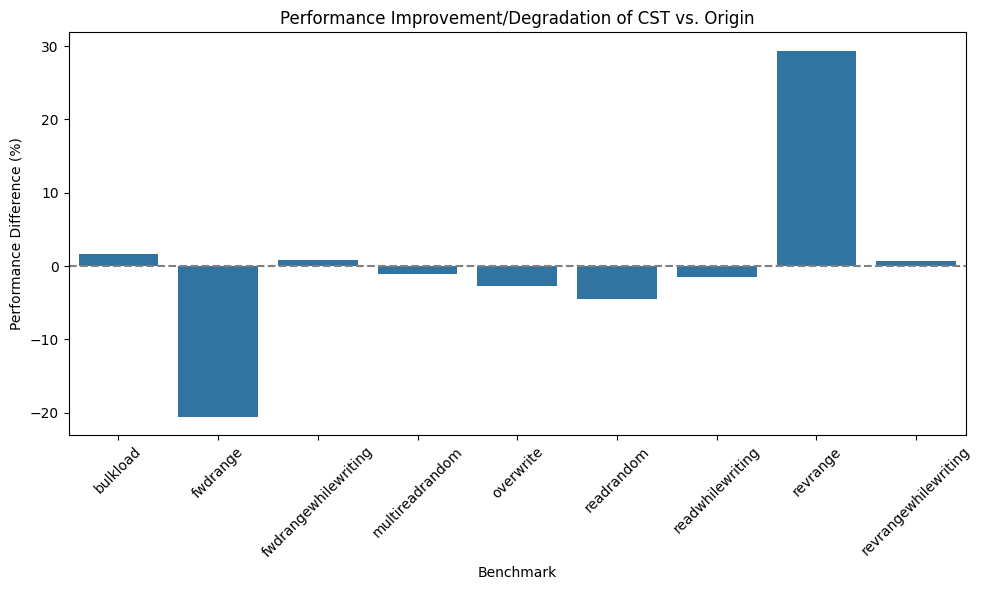

In [2]:
import os
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data_folder_path = "/data/out"

bms = ['cst', 'ori']
dfs = []


for bm in bms:
    tech_dir = os.path.join("/data/out", bm)
    for file in os.listdir(tech_dir):
        file_path = os.path.join(tech_dir, file, "report.tsv")
        print(file_path)
        df = pd.read_csv(file_path, sep='\t', header=25)
        df['Benchmark'] = file
        df['Configuration'] = bm
        dfs.append(df)
all_data = pd.concat(dfs, ignore_index=True)


performance_diff = all_data.pivot(index='Benchmark', columns='Configuration', values='ops_sec')
performance_diff['Difference'] = (performance_diff['cst'] - performance_diff['ori']) / performance_diff['ori'] * 100

# Reset index to turn the benchmarks into a column again
performance_diff = performance_diff.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Benchmark', y='Difference', data=performance_diff)
plt.axhline(0, color='gray', linestyle='--')  # Add a line at y=0 for reference
plt.xlabel('Benchmark')
plt.ylabel('Performance Difference (%)')
plt.title('Performance Improvement/Degradation of CST vs. Origin')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.tight_layout()
plt.show()